<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Laboratorio 1.0:


## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 25/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El DataFrame contiene el precio de apertura, cierre, valor más bajo cotizado, valor más alto cotizado, volumen, spread, etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como índice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cuál es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Puntos 1 al 5

In [ ]:
# ==================== 1. Leer el dataset desde el github. ====================
#
dataset = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head(5)

,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


**Información del DataFrame:**

El DataFrame contiene información del precio del EUR/USD  desde el 25/07/2022/ hasta el 12/05/2023 con periodicidad de una hora.

* ```open``` $⟷$ Precio de apertura: Es el primer precio al que se realizó una transacción al inicio de esa hora.

* ```close``` $⟷$ Precio de cierre: Es el último precio registrado al final de ese intervalo temporal.

* ```high``` $⟷$ Precio más alto al que se cotizó el EUR/USD durante esa hora específica.

* ```low``` $⟷$ Precio más bajo cotizado.

* ```tick_volume``` $⟷$ Volumen de transacciones realizado durante esa hora. Este valor generalmente representa la cantidad de unidades del activo (EUR/USD) que se negociaron y puede ser una indicación del nivel de actividad del mercado.

* ```spread``` $⟷$ Es la diferencia entre el precio de compra (bid) y el precio de venta (ask) del EUR/USD en ese momento.

  * Un spread más pequeño indica un mercado más líquido, mientras que un spread más grande indica menos liquidez y posiblemente más volatilidad.

\
Estos datos son comunes en análisis de series temporales financieras para identificar tendencias, volatilidad y patrones de precios en los mercados de divisas.

In [ ]:
# ==================== 2. Definir como índice la columna time. ====================
df = dataset.copy()
df.set_index('time', inplace=True)
df.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [ ]:
# ==================== 3. Obtenga información del data frame. ====================

print('Cantidad de datos:', len(df))

df.describe()

Cantidad de datos: 5000


,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


In [ ]:
# ==================== 4. Determine si hay null, nan en el DataFrame. ====================

print('=========== DataFrame original con ceros ===========')
print("Contiene null's?:", df.isnull().any().any())
print("Contiene NAN's?:", df.isna().any().any())

# Reemplazamos todos los ceros del DataFrame por nan's
df.replace(0, np.nan, inplace=True)
dataset.replace(0, np.nan, inplace=True)

print('\n=========== DataFrame sin ceros ===========')
print("Contiene null's?:", df.isnull().any().any())
print("Contiene NAN's?:", df.isna().any().any())

df.isna().sum()

=========== DataFrame original con ceros ===========
Contiene null's?: False
Contiene NAN's?: False

=========== DataFrame sin ceros ===========
Contiene null's?: True
Contiene NAN's?: True


,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,1
real_volume,5000
MeanCloseOpen,0
Diff_Close,27
Diff_Open,21


In [ ]:
# Eliminamos las filas y columnas que sean completamente nulas
df.dropna(axis=1, how='all', inplace=True)
dataset.dropna(axis=1, how='all', inplace=True)

''' Documentación
* dropna elimina las filas y columnas con al menos un NA por defecto.
* 'axis' indica si se elimina una fila o columna.
* 'how' establece si la fila o columna se elimina del DataFrame, cuando tenemos al menos un NA o todos NA.
* 'inplace' indica si se modifica el DataFrame original.
'''
df.head()

,open,high,low,close,tick_volume,spread,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8.0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8.0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8.0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8.0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7.0,1.023330,-0.00304,0.00031,-0.001365


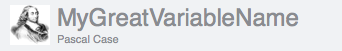

In [ ]:
# ========= 5. Emplea la notación Pascal Case y trabaja solo con la columa del precio de cierre del EUR/USD. =========

columns = [df.index.name] + df.columns.tolist()
columns

['time',
 'open',
 'high',
 'low',
 'close',
 'tick_volume',
 'spread',
 'MeanCloseOpen',
 'Diff_Close',
 'Diff_Open',
 'Diff_MeanCloseOpen']

In [ ]:
def pascal_case(cols):
  #
  new_cols = []
  for c in cols:
    words = c.split("_")
    for i in range(len(words)):
      w = words[i]
      if not w[0].isupper():
        words[i] = w.capitalize()

    new_c = "".join(words)
    new_cols += [new_c]
  #
  return new_cols
# ============================================

new_cols = pascal_case(columns)   # Convertimos el nombre de las columnas a PascalCase

df.columns = new_cols[1::]     # Actualizamos los datasets
df.index.name = new_cols[0]
dataset.columns = new_cols
df.head()

,Open,High,Low,Close,TickVolume,Spread,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
Time,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8.0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8.0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8.0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8.0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7.0,1.023330,-0.00304,0.00031,-0.001365


### Punto 6 - Mejor distribución para los datos de la diferencia del precio de cierre (DiffClose)

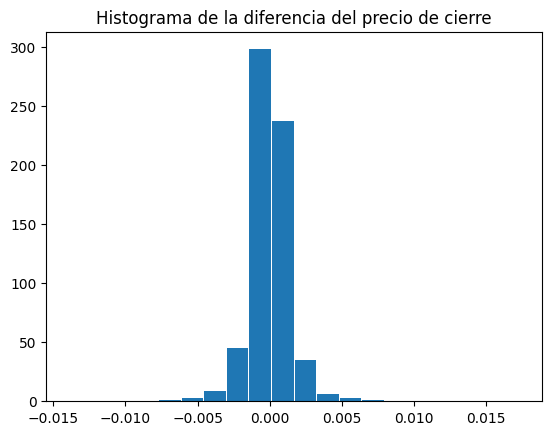

In [ ]:
# Histograma de DiffClose
if df.DiffClose.isna().any():
  Diff_Close = df.DiffClose.dropna(inplace=False).values
else:
  Diff_Close = df.DiffClose.values

plt.figure()
plt.title("Histograma de la diferencia del precio de cierre")
ys, xs,_ = plt.hist(Diff_Close, bins=20, density=True, rwidth=0.95)
plt.show()

**Nota:**

Para encontrar la mejor distribución que se ajuste al histograma utilizamos la librería ```Fitter```.


* De acuerdo al histograma, la distribución puede acercarse muy bien a la distribución normal o la beta.

In [ ]:
# sns.set_style('white')
# sns.set_context("paper", font_scale=1)
# sns.displot(data=df, x="DiffClose", kind="hist", bins = 100, aspect = 1.5)

In [ ]:
!pip install fitter &> /dev/null

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,24712.961893,-313.092955,-300.069398,inf,0.042960,2.060068e-08
lognorm,102852.984802,3052.979615,3072.514951,inf,0.091025,2.631847e-36
norm,103089.610309,3159.024030,3172.047587,inf,0.089953,1.827800e-35
exponpow,672219.938021,250.984485,270.519821,inf,0.532162,0.000000e+00
chi2,692559.177351,-609.296873,-589.761537,inf,0.398396,0.000000e+00


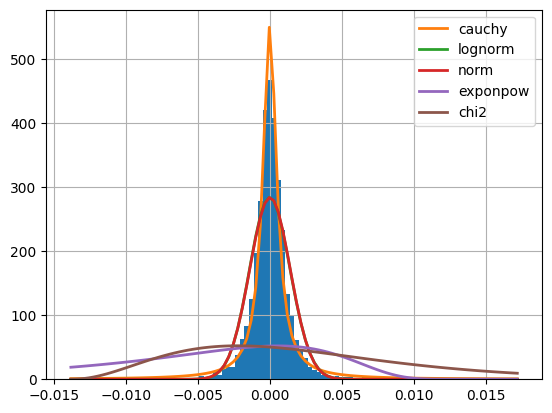

In [ ]:
f = Fitter(Diff_Close, distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Indentificamos la mejor distribucion con el error cuadratico medio
best_dist = f.get_best(method = 'sumsquare_error')
best_dist

{'cauchy': {'loc': -4.006023168563858e-06, 'scale': 0.0005769859144687666}}

In [ ]:
name = list(best_dist.keys())[0]

# Parámetros de la distribución
mu, sigma = f.fitted_param[name]
# mu = best_dist[name]['loc']
# sigma = best_dist[name]['scale']

print('Mejor distribución para describir los datos de Diff_Close:', name)
print('-> Media:', mu)
print('-> Desviación estándar:', sigma)

Mejor distribución para describir los datos de Diff_Close: cauchy
-> Media: -4.006023168563858e-06
-> Desviación estándar: 0.0005769859144687666


### Puntos 7 a 9

7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Nótese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

In [ ]:
# ============= 7. Para el DataFrame, seleccionemos solo los datos del 2023 =============

# Convertimos las fechas en formato datetime
df.index = pd.to_datetime(df.index)
dataset.Time = pd.to_datetime(dataset.Time.values)    # Convertimos las fechas del Dataset también
df_2023 = df[df.index.year == 2023]
df_2023.head()

,Open,High,Low,Close,TickVolume,Spread,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
Time,,,,,,,,,,
2023-01-02 00:00:00,1.06998,1.07061,1.06795,1.06796,98,57.0,1.068970,-0.00200,-0.00063,-0.001315
2023-01-02 01:00:00,1.06847,1.06965,1.06847,1.06965,91,183.0,1.069060,0.00169,-0.00151,0.000090
2023-01-02 02:00:00,1.06965,1.07060,1.06904,1.07058,325,11.0,1.070115,0.00093,0.00118,0.001055
2023-01-02 03:00:00,1.07058,1.07075,1.06837,1.06896,271,26.0,1.069770,-0.00162,0.00093,-0.000345
2023-01-02 04:00:00,1.06895,1.06896,1.06799,1.06880,137,78.0,1.068875,-0.00016,-0.00163,-0.000895


In [ ]:
# =================== 8. Datos con periodicidades ===================

# ::::::::::::: Periodicidad de 15 días :::::::::::::
df_15D = df.groupby(pd.Grouper(level='Time', freq='15D')).mean()
# dataset.groupby(pd.Grouper(key='Time', freq='15D')).mean()

# ::::::::::::: Periodicidad de 1 semana :::::::::::::
df_1sem = df.groupby(pd.Grouper(level='Time', freq='7D')).mean()

# ::::::::::::: Periodicidad de 1 mes :::::::::::::
df_1mes = df.groupby(pd.Grouper(level='Time', freq='1ME')).mean()

df_1mes

,Open,High,Low,Close,TickVolume,Spread,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
Time,,,,,,,,,,
2022-07-31,1.018310,1.019409,1.017178,1.018298,3859.401869,8.850467,1.018304,-0.000013,-0.000027,-0.000020
2022-08-31,1.012754,1.013610,1.011906,1.012731,3319.713768,9.173913,1.012742,-0.000031,-0.000031,-0.000031
2022-09-30,0.990412,0.991527,0.989313,0.990365,4722.812500,8.984848,0.990388,-0.000048,-0.000047,-0.000048
2022-10-31,0.983676,0.984777,0.982582,0.983698,5206.746032,9.011905,0.983687,0.000016,0.000015,0.000016
2022-11-30,1.019757,1.020931,1.018684,1.019872,4796.717268,8.844402,1.019815,0.000100,0.000101,0.000100
2022-12-31,1.058424,1.059390,1.057494,1.058478,3839.261905,8.791252,1.058451,0.000059,0.000060,0.000059
2023-01-31,1.077433,1.078325,1.076588,1.077463,3347.763258,9.577652,1.077448,0.000031,0.000032,0.000031
2023-02-28,1.071221,1.071972,1.070433,1.071167,3029.912500,8.825000,1.071194,-0.000061,-0.000062,-0.000061
2023-03-31,1.070837,1.071657,1.070032,1.070874,3282.461818,8.901818,1.070855,0.000049,0.000049,0.000049


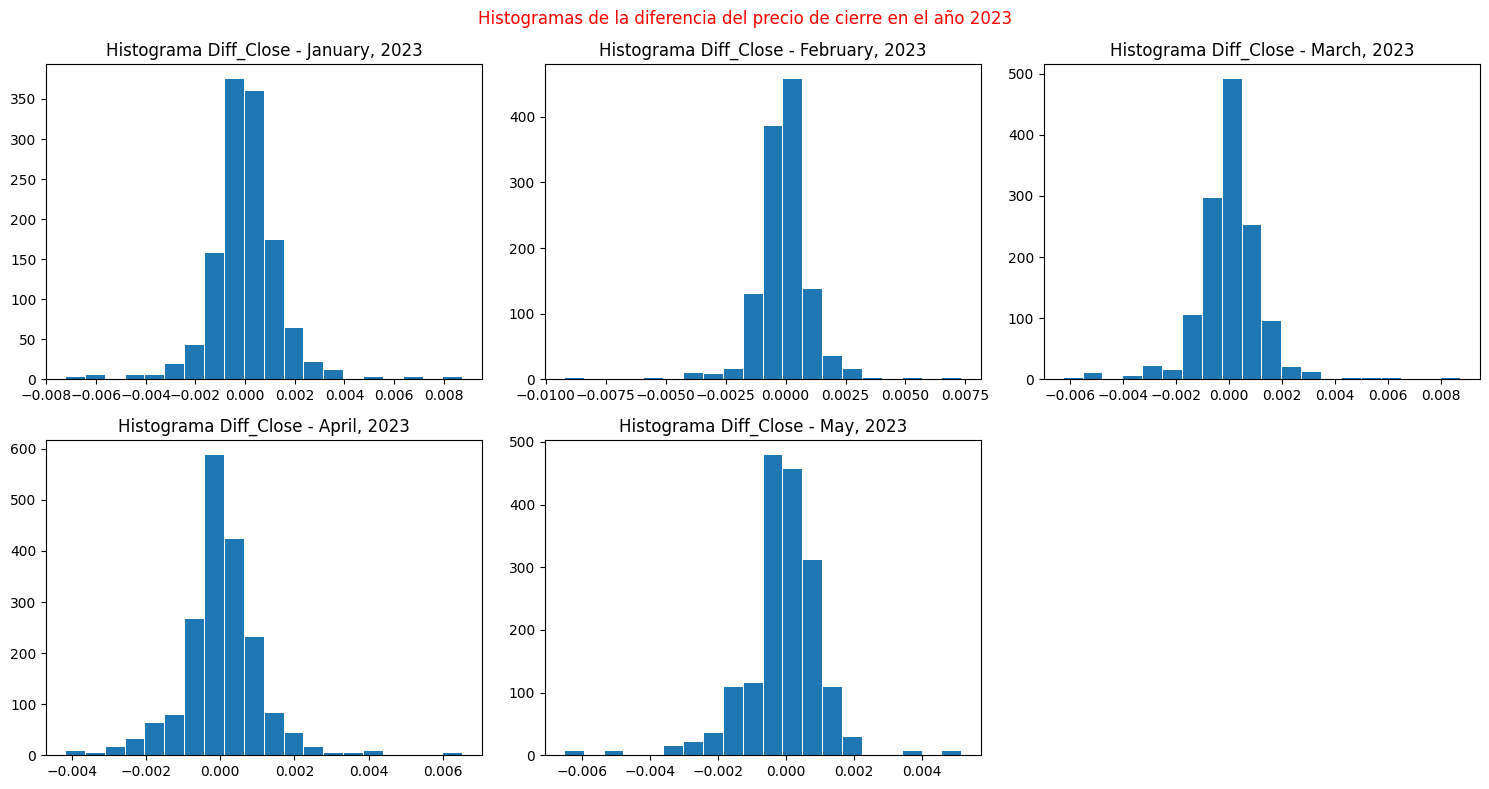

In [ ]:
# ================== 9. Histogramas de Diff_Close para cada mes del año 2023 ==================

df_2023_Mes = df_2023.groupby(pd.Grouper(level='Time', freq='1ME'))
meses = len(df_2023_Mes)
rows = meses//3 + 1

fig = plt.figure(figsize=(15, 4*rows))
fig.suptitle("Histogramas de la diferencia del precio de cierre en el año 2023", color='r')

nfig = 1
for name, group in df_2023_Mes:
  # print('\nNombre del grupo:',name, '\n-> Grupo de datos:', group)
  Diff_Close_mes = group.DiffClose.values

  ax = fig.add_subplot(rows,3,nfig)
  ax.set_title("Histograma Diff_Close - " + name.strftime("%B") + ", 2023")
  ax.hist(Diff_Close_mes, bins=20, density=True, rwidth=0.95)
  nfig += 1

fig.tight_layout()

## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

### DataSet: Breast Cancer Wisconsin (Diagnostic)

Dataset de cáncer de mama de Wisconsin es un conjunto de datos que contiene información sobre características de células obtenidas a través de aspiración con aguja fina de tumores mamarios.

#### Estructura del Dataset

1. **Cantidad de datos**: El dataset contiene un total de 569 instancias, donde cada instancia corresponde a un tumor.

2. **Características**: Cada muestra se describe mediante 30 características que describen la forma y la textura de las células. Estas características incluyen medidas como el radio, la textura, el perímetro, el área, la suavidad, la compactación, la concavidad, la puntuación de puntos cóncavos, la simetría y la dimensión fractal.

3. **Etiquetas**: Cada muestra está etiquetada como benigna o maligna a partir de la variable ```Diagnosis```.

In [ ]:
!pip install ucimlrepo &> /dev/null

In [ ]:
""" =================== 1. Leer los datos desde una página web. =================== """
#
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
data = breast_cancer_wisconsin_diagnostic.data.features     # Data de las características
target = breast_cancer_wisconsin_diagnostic.data.targets   # Data de objetivos

# Información de variables
breast_cancer_wisconsin_diagnostic.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


In [ ]:
df = data.copy()
df.insert(0, "Diagnosis", target)
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
""" =================== 2. Renombrar las columnas en formato PascalCase. =================== """
#
colnames = df.columns.tolist()

new_colnames = pascal_case(colnames)
df.columns = new_colnames
data.columns = new_colnames[1::]
df.head()
#

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
""" ======= 3. Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame. ======= """

df.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Veamos los últimos 5 elementos del dataset
df.tail()

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
""" =========== 4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame.
Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?. =========== """

print("Contiene null's?:", df.isnull().any().any())
print("Contiene NAN's?:", df.isna().any().any())

# Reemplazamos todos los ceros del DataFrame por nan's
df.replace(0, np.nan, inplace=True)
# dataset.replace(0, np.nan, inplace=True)

print('\n=========== DataFrame sin ceros ===========')
print("Contiene null's?:", df.isnull().any().any())
print("Contiene NAN's?:", df.isna().any().any())

df.isna().sum()

Contiene null's?: False
Contiene NAN's?: False

=========== DataFrame sin ceros ===========
Contiene null's?: True
Contiene NAN's?: True


,0
Diagnosis,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,13
ConcavePoints1,13
Symmetry1,0


**Observación:**

* Vemos que el dataset sí contiene datos nulos en algunas de sus columnas, pero no hay filas ni columnas nulas completamente, por lo que NO es indicado eliminar ningún dato.

* Podemos realizar una búsqueda de duplicados y si se encuentran depurarlos.

In [ ]:
ndups = len(df[df.duplicated()])
print('Cantidad de filas duplicadas:', ndups)

# df.drop_duplicates(inplace=True)

Cantidad de filas duplicadas: 0


In [ ]:
""" =========== 5. Identificar los valores únicos en la columna target que representan las etiquetas B y M
(Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores. =========== """

target_vals = target.Diagnosis.unique()
print('Valores únicos de la columna target:', target_vals)

Valores únicos de la columna target: ['M' 'B']


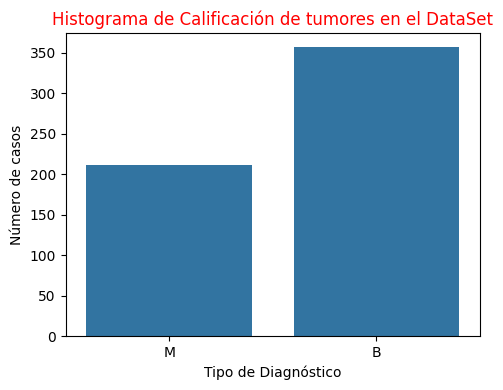

In [ ]:
""" =========== 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot() =========== """

fig = plt.figure(figsize=(5,4))
plt.title("Histograma de Calificación de tumores en el DataSet", color='r')
sns.countplot(data=df, x="Diagnosis")
plt.xlabel("Tipo de Diagnóstico")
plt.ylabel("Número de casos")
fig.tight_layout()

In [ ]:
# df.replace("M", 1, inplace=True)
# df.replace("B", 0, inplace=True)
# df.tail()

In [ ]:
""" =========== 7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0
a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno). =========== """

DiagnosisNumeric = df.Diagnosis.apply(lambda x: 0 if x=='B' else 1)
df_original = df.copy()
df.Diagnosis = DiagnosisNumeric
df.rename(columns={'Diagnosis': 'DiagnosisNumeric'}, inplace=True)
df.tail()

,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,NaN,NaN,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,NaN,NaN,0.2871,0.07039


In [ ]:
""" =========== 8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula: (x - mean(x))/std(x) =========== """
#
df_norm = (df - df.mean())/df.std()
df_norm.DiagnosisNumeric = df.DiagnosisNumeric    # La columna cualitativa 'Diagnosis' la dejamos intacta
df_norm.head()

,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.632829,2.519327,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.095456,2.311155,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.050027,0.522030,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.178685,1.072207,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.340477,2.020847,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.830970,1.961628,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.894163,1.431497,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.974568,2.187884,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.348028,1.408131,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.587260,0.705516,-0.867590,-0.396751


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

\
**Observación:**

Del DataFrame vemos que para cada tumor que se estudia se le han extraído 3 células que ha sido caracterizadas a partir de las siguientes propiedades:

  * Radio, textura, perímetro, área, suavidad, compactibilidad, concavidad, puntos cóncavos, simetría y dimensión fractal.

  * Diagnóstico benigno o maligno.

In [ ]:
# re.match para encontrar el patrón de prefijo común para cada nombre de columna en el DataFrame
import re

In [ ]:
# Buscamos los patrones en los nombres de las columnas
columns = df.columns.to_list()
columns.remove('DiagnosisNumeric')  # Excluimos la columna de diagnóstica que es única para cada muestra
cols = np.zeros(len(columns), dtype=object)

for i in range(len(columns)):
  cols[i] = re.match(r'^[a-zA-Z_]+', columns[i]).group(0)

# Como este algoritmo devuelve los nombres patrón, se repiten en el array en que se almacenan
# Observemos los valores únicos para este arreglo de nombres

_, idx, counts = np.unique(cols, return_index=True, return_counts=True)
cols_rs = cols[np.sort(idx)]   # Datos ordenados de acuerdo a la búsqueda

print('Los nombres de columnas que tenían un sufijo son:')

print('\tCaracterística \t Nro. Repeticiones')
print('---------------------------------------------')
for i in range(len(cols_rs)):
  print('\t', cols_rs[i], '\t', counts[i])

n_cells = np.unique(counts)[0]
print('\nLa cantidad de células es:', n_cells)

Los nombres de columnas que tenían un sufijo son:
	Característica 	 Nro. Repeticiones
---------------------------------------------
	 Radius 	 3
	 Texture 	 3
	 Perimeter 	 3
	 Area 	 3
	 Smoothness 	 3
	 Compactness 	 3
	 Concavity 	 3
	 ConcavePoints 	 3
	 Symmetry 	 3
	 FractalDimension 	 3

La cantidad de células es: 3


In [ ]:
df

,DiagnosisNumeric,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
""" DataFrame de la media de características por cada muestra """
means = {}
for namec in cols_rs:
  cols_df = [col for col in df.columns if col.startswith(namec)]
  means[namec+'Mean'] = df[cols_df].mean(axis=1)    # Promedio de radio entre las 3 células por cada muestra

means_df = pd.DataFrame(means)
means_df.insert(0, 'DiagnosisNumeric', df.DiagnosisNumeric)
means_df.head()

,DiagnosisNumeric,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,1,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,1,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,1,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908


In [ ]:
""" DataFrame de la media de cada característica para cada célular """
#
# cells = [f'Célula_{i}' for i in range(n_cells)]
# cols_mean = [f'{col}Mean' for col in cols_rs]

# cells_df = pd.DataFrame(columns=cols_mean, index=cells)

# for namec in cols_rs:
#   cols_df = [col for col in df.columns if col.startswith(namec)]
#   cells_df[namec+'Mean'] = df[cols_df].mean().values

# cells_df

' DataFrame de la media de cada característica para cada célular '

10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

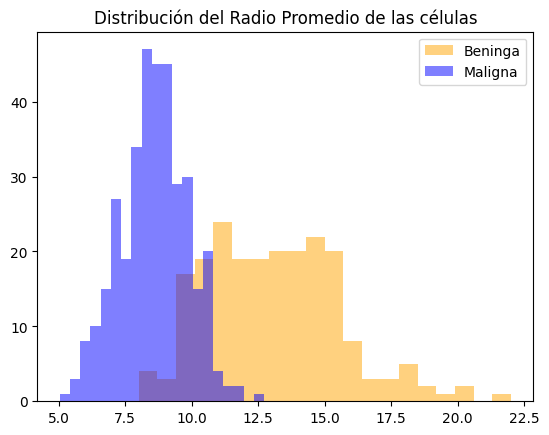

In [ ]:
# Valor 1 -> B (Benigno).   Valor 0 -> M (Maligno).
masc = means_df.DiagnosisNumeric == 1
RadiusMean1 = means_df.RadiusMean[masc]
RadiusMean0 = means_df.RadiusMean[~masc]

plt.title('Distribución del Radio Promedio de las células')
plt.hist(RadiusMean1, bins=20, label='Beninga', alpha=0.5, color='orange')
plt.hist(RadiusMean0, bins=20, label='Maligna', alpha=0.5, color='blue')
plt.legend()
plt.show()



11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```



In [ ]:
means_df.DiagnosisNumeric = target
means_df.rename(columns={'DiagnosisNumeric': 'Diagnosis'}, inplace=True)
means_df.head()

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,M,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,M,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,M,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,M,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,M,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908


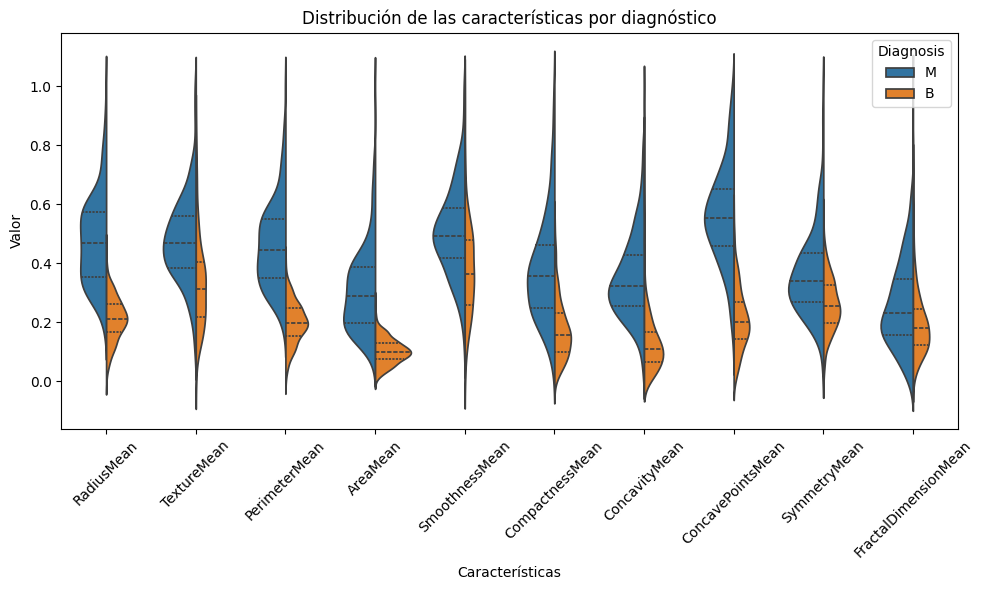

In [ ]:
means_df_norm = means_df.copy()

# Normalizamos los datos
for col in means_df.columns[1:]:
    min_val = means_df[col].min()
    max_val = means_df[col].max()
    means_df_norm[col] = (means_df[col] - min_val)/(max_val - min_val)

# melt -> Transforma el DataFrame de tal forma que todas las columnas de características seleccionadas se "aplanan" en tres columnas nuevas: {DiagnosisNumeric, features, value}
df_melted = pd.melt(means_df_norm, id_vars="Diagnosis", var_name="features", value_name="value")

fig = plt.figure(figsize=(10, 6))

# hue -> Utiliza la columna Diagnosis para diferenciar las distribuciones por categorías
# split=True -> Permite que ambos grupos aparezcan en el mismo gráfico de violín
# inner="quart" -> Añade líneas de cuartiles dentro de los gráficos de violín (distribución del 25%, 50% y 75% de los datos)
sns.violinplot(x="features", y="value", hue="Diagnosis", data=df_melted, split=True, inner="quart")

plt.title('Distribución de las características por diagnóstico')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.xticks(rotation=45)
fig.tight_layout()

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


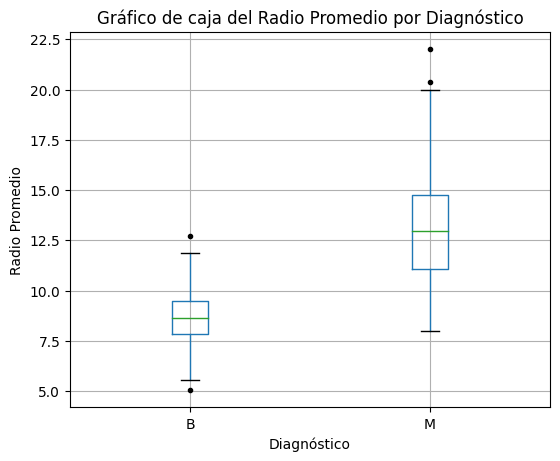

In [ ]:
""" ===================== Valores atípicos para RadiusMean ===================== """

means_df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(6,5))

plt.title('Gráfico de caja del Radio Promedio por Diagnóstico')
plt.suptitle('')
plt.xlabel('Diagnóstico')
plt.ylabel('Radio Promedio')
plt.show()

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

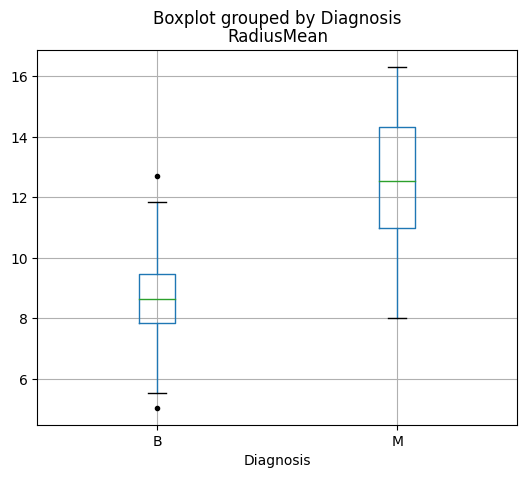

In [ ]:
# Definimos los outliers a partir del intercuartílico
Q1 = means_df['RadiusMean'].quantile(0.25)
Q3 = means_df['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1   # Rango intercuartílico

# Eliminamos los valores atípicos
means_df2 = means_df[~((means_df['RadiusMean'] < ( Q1-1.5*IQR )) | (means_df['RadiusMean'] > (Q3+1.5*IQR)))]
# '|' es un operador que se utiliza para combinar dos condiciones.

means_df2.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(6,5))

13. Encontrar la matriz de correlación, emplear el método corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [ ]:
means_df.columns

Index(['Diagnosis', 'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean'],
      dtype='object')

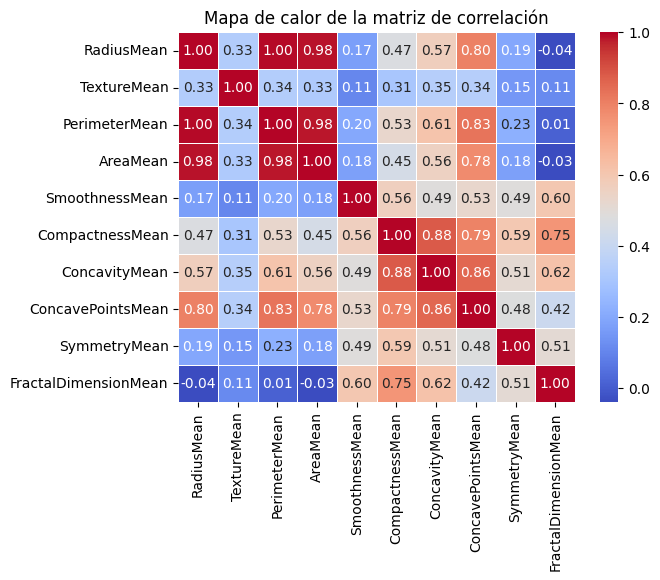

In [ ]:
# ==================== Matriz de correlación ====================
Mcor = means_df.iloc[:, 1:11].corr()

# Generamos un heatmap con seaborn para la matriz de correlación
plt.figure()
sns.heatmap(Mcor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

**Observaciones:**

* Vemos que algunas características geométricas como el perímetro, el área y el radio tienen una correlación bastante alta. Esto se esperaba gracias a sus relaciones matemáticas.

  Así mismo, el perímetro, el área, la compactibilidad y la concavidad también son relaciones geométricas que se correlacionan altamente en los datos.

* Por otro lado, vemos que la dimensión fractal guarda una correlación media de un 50% con características como la simetría, la concavidad, la compactibilidad y la suavidad de las células.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

\
> * Gráficos de dispersión para observar la correlación entre dos características.
>
> * Gráficos de distribución (barras o de densidad) para una sola variable continua para entender su tipo de distribución, la simetría, la kurtosis, el sesgo, entre otros.
>
> * Gráficos de enjambre que permiten mostrar la dispersión de los datos sin superponer puntos. Este sería útil para mostrar cómo los puntos individuales se distribuyen entre las características.

Hint:


```python
df['time'] =  pd.to_datetime(df.time)
df.set_index("time", inplace=True)
df = df.drop(columns = ["Unnamed: 0"])
df["DiffClose"] = df.close.diff()
df2 = df[["DiffClose", "close"]][1:]
df2.DiffClose.hist(bins=1000)


!pip install fitter


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()a
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]




f = Fitter(df2.DiffClose,
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]



df2.groupby(pd.Grouper(freq='15D')).mean()
```